In [675]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [676]:
# Import Pandas and NumPy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [677]:
#Import Leads.csv to leads df
leads = pd.read_csv('Leads.csv')

In [678]:
#Check the df
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [679]:
#Describe the df
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [680]:
#Check the info to see the types of variables
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [681]:
#Check the number of missing values in each column

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [682]:
# Let's check the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [683]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [684]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [685]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [686]:
# Let's check the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [687]:
#There are variables that have a level called 'Select' which needs to be handled because it is as good as a null value.

leads=leads.replace('Select',np.nan)
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [688]:
#We have a lot of null values again
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [689]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [690]:
# counting each category of values in a column
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].astype('category')
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [691]:
#Filled the NaN values in the 'What matters most to you in choosing a course' column 
leads.loc[pd.isnull(leads['What matters most to you in choosing a course']),['What matters most to you in choosing a course']] = 'Better Career Prospects'
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [692]:
#What is your current occupation" has almost 30% null values. Deleting so many rows will result in loosing a lot of data set. And this looks like an important feature for analysis. So the null values can be imputed to 'Other'

leads["What is your current occupation"].fillna('Other',inplace=True)

In [693]:
#Check the data again-
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [694]:
#Removing Country column as it is not relevant for our analysis-
leads.drop(['Country'], axis=1, inplace=True)

In [695]:
#Check the data again-
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [696]:
#Now dropped few more unwanted columns as per business understanding-
leads = leads.drop(columns=['Prospect ID', 'Lead Number', 'Magazine','I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses'])

In [697]:
#Check the data again-
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Last Notable Activity                            0.00
dtype: float64

In [698]:
# Drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['Lead Source'])]
leads = leads[~pd.isnull(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]
leads = leads[~pd.isnull(leads['Last Activity'])]

In [699]:
#Check the data again-
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Last Notable Activity                            0.0
dtype: float64

In [700]:
#Check the quantity of data lost:
print(len(leads.index))
print(len(leads.index)/9240)

9074
0.982034632034632


In [701]:
#Now we have clean data with no null values

In [702]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,Modified


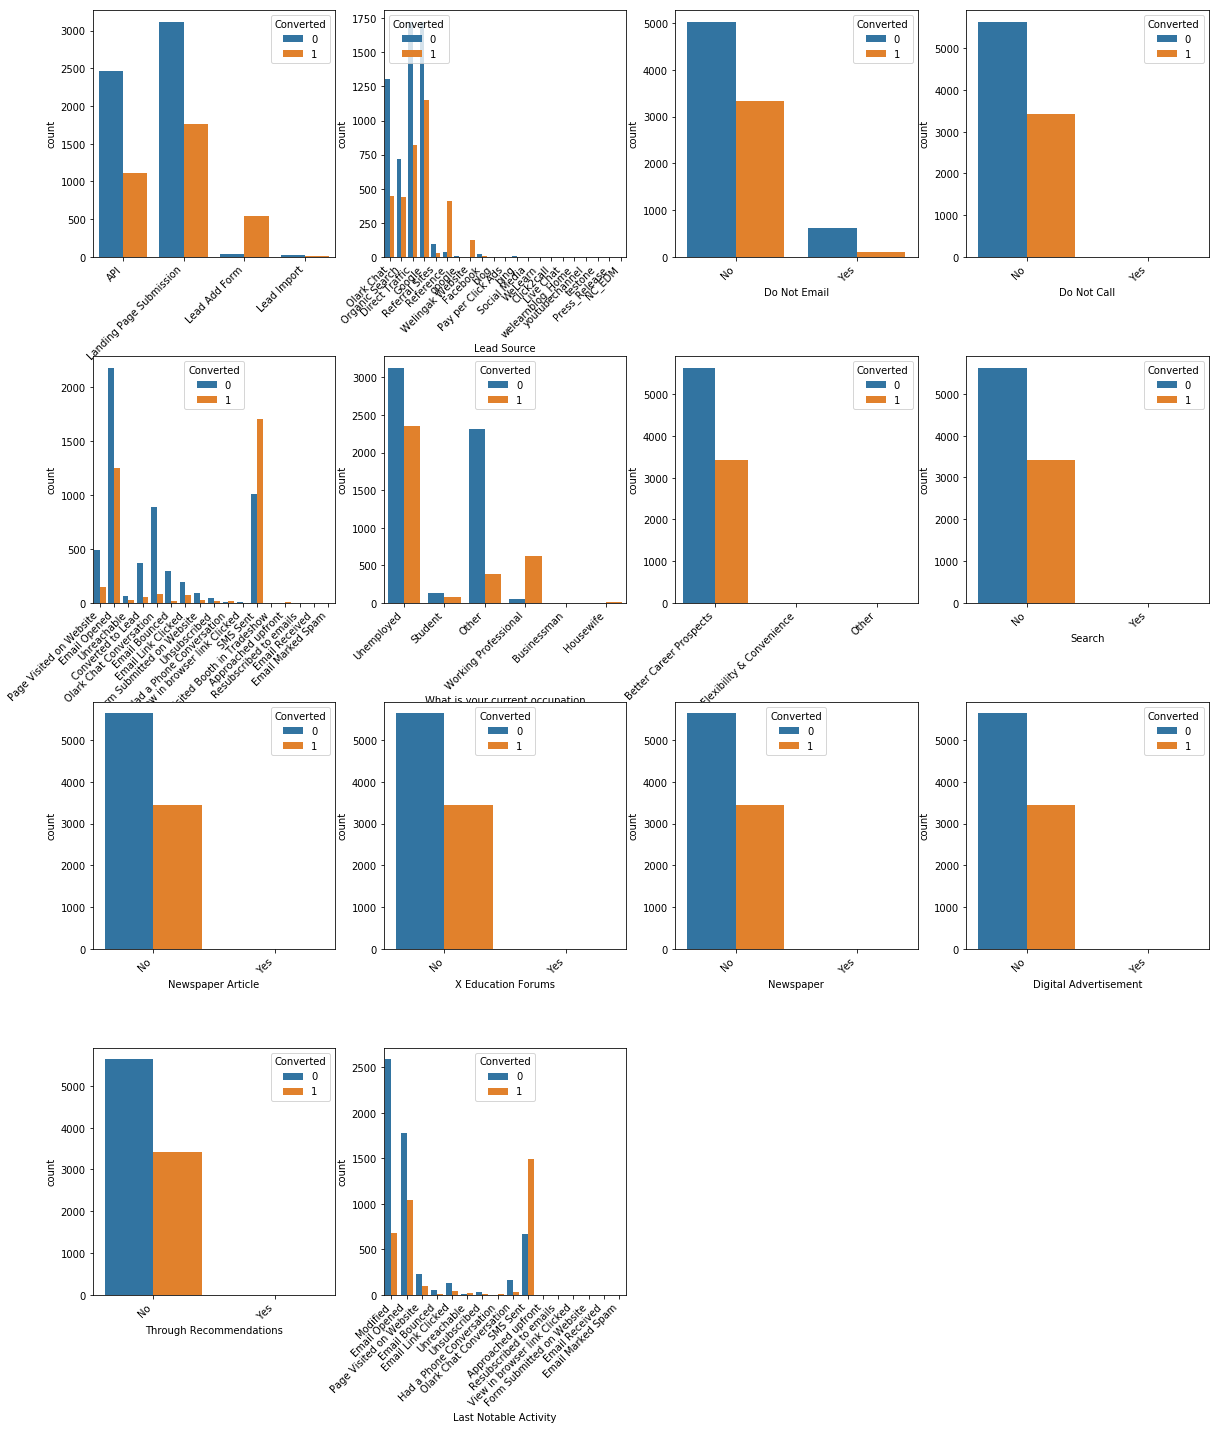

In [703]:
#Perform univariate analaysis to see the graphical representation of variables-
cat_vars = list(leads.select_dtypes(exclude=[np.number]).columns)
fig = plt.figure(figsize=(20, 30), )

cnt = 1
for var in cat_vars:
    plt.subplot(5, 4, cnt)
    ax=sns.countplot(x=leads[var], hue=leads["Converted"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    cnt=cnt+1

plt.subplots_adjust(hspace = 0.4)
plt.show()

In [704]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Last Notable Activity'],
      dtype='object')

In [705]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead_data list
leads[varlist] = leads[varlist].apply(binary_map)

In [706]:
# Create dummy variables using 'get_dummies'-
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','What matters most to you in choosing a course',
                              'What is your current occupation', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [707]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','What matters most to you in choosing a course',
                   'What is your current occupation',
                   'Last Notable Activity'], 1)

In [708]:
# Let's take a look at the dataset again

leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [709]:
# Changing the Datatypes from Float to int 
leads.TotalVisits = leads.TotalVisits.astype("int64")
leads["Page Views Per Visit"] = leads["Page Views Per Visit"].astype("int64")

In [710]:
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5,674,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2,1532,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,305,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2,1428,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [711]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 73 columns):
Do Not Email                                                               9074 non-null int64
Do Not Call                                                                9074 non-null int64
Converted                                                                  9074 non-null int64
TotalVisits                                                                9074 non-null int64
Total Time Spent on Website                                                9074 non-null int64
Page Views Per Visit                                                       9074 non-null int64
Search                                                                     9074 non-null int64
Newspaper Article                                                          9074 non-null int64
X Education Forums                                                         9074 non-null int64
Newspaper                             

In [712]:
# Import the required library

from sklearn.model_selection import train_test_split

In [713]:
# Put all the feature variables in X

X = leads.drop(['Converted'], 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5,674,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,1532,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,305,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2,1428,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [714]:
# Put the target variable in y

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [715]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [716]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.007968,0.178347,0.083333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.007968,0.085355,0.083333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.007968,0.619946,0.083333,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.019920,0.711590,0.083333,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [717]:
# Let's see the correlation matrix 
leads.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.004346,-0.140786,0.035715,-0.046192,0.037881,-0.011505,-0.004346,-0.003073,-0.003073,...,-0.003073,-0.011505,0.122812,-0.012911,0.050922,-0.003073,-0.029608,-0.010516,0.241202,-0.003073
Do Not Call,-0.004346,1.000000,0.019024,0.003190,0.007029,-0.005491,-0.000584,-0.000220,-0.000156,-0.000156,...,-0.000156,-0.000584,0.019795,-0.002130,-0.002830,-0.000156,-0.008279,-0.000883,-0.001048,-0.000156
Converted,-0.140786,0.019024,1.000000,0.032855,0.359261,-0.002946,-0.001735,0.003718,-0.008194,-0.008194,...,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
TotalVisits,0.035715,0.003190,0.032855,1.000000,0.219723,0.481562,0.049479,0.033751,0.035749,0.014140,...,-0.003146,0.022317,-0.107875,-0.037993,0.227450,-0.007468,-0.001620,0.005513,0.003061,0.009819
Total Time Spent on Website,-0.046192,0.007029,0.359261,0.219723,1.000000,0.306170,0.013181,0.011618,0.006376,0.025592,...,-0.003772,0.022925,-0.127020,-0.050877,0.028713,-0.009298,0.137169,0.009594,0.003951,-0.007584
Page Views Per Visit,0.037881,-0.005491,-0.002946,0.481562,0.306170,1.000000,0.029551,0.021937,-0.001458,0.003390,...,-0.001458,0.011397,-0.089543,-0.089076,0.011170,-0.011155,0.062194,0.020069,0.022797,-0.001458
Search,-0.011505,-0.000584,-0.001735,0.049479,0.013181,0.029551,1.000000,0.188565,0.267070,-0.000413,...,-0.000413,-0.001545,-0.017786,-0.005640,0.007777,-0.000413,-0.015317,-0.002339,-0.002775,-0.000413
Newspaper Article,-0.004346,-0.000220,0.003718,0.033751,0.011618,0.021937,0.188565,1.000000,0.707068,-0.000156,...,-0.000156,-0.000584,0.019795,-0.002130,-0.002830,-0.000156,-0.008279,-0.000883,-0.001048,-0.000156
X Education Forums,-0.003073,-0.000156,-0.008194,0.035749,0.006376,-0.001458,0.267070,0.707068,1.000000,-0.000110,...,-0.000110,-0.000413,0.013997,-0.001506,-0.002001,-0.000110,-0.005854,-0.000625,-0.000741,-0.000110
Newspaper,-0.003073,-0.000156,-0.008194,0.014140,0.025592,0.003390,-0.000413,-0.000156,-0.000110,1.000000,...,-0.000110,-0.000413,-0.007875,-0.001506,-0.002001,-0.000110,-0.005854,-0.000625,-0.000741,-0.000110


In [718]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [719]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [720]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 16),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Search', False, 56),
 ('Newspaper Article', False, 27),
 ('X Education Forums', False, 44),
 ('Newspaper', False, 8),
 ('Digital Advertisement', False, 51),
 ('Through Recommendations', False, 43),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 25),
 ('Lead Sour

In [721]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]


In [722]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [723]:
# Import statsmodels

import statsmodels.api as sm

In [724]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.7
Date:                Sun, 09 Jun 2019   Deviance:                       5301.4
Time:                        16:20:33   Pearson chi2:                 6.51e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9927      0.089    -11.134      0.000      -1.167      -0.818
Do Not Email                                            -1.5744      0.199     -7.924      0.000      -1.964      -1.185
TotalVisits                                              7.3115      2.155      3.392      0.001       3.087      11.536
Total Time Spent on Website                              4.5409      0.163     27.779      0.000       4.220       4.861
Lead Origin_Lead Add Form                                4.0411      0.225     17.940      0.000       3.600       4.483
Lead Source_Olark Chat                                   1.3605      0.110     12.355      0.000       1.145       1.576
Lead Source_Welingak Website                             2.0590      0.754      2.729      0.006       0.580       3.538
Last Activity_Email Bounced                             -1.2132      0.426     -2.849      0.004      -2.048      -0.379
Last Activity_Had a Phone Conversation                   1.9283      0.783      2.462      0.014       0.393       3.464
Last Activity_Olark Chat Conversation                   -1.7584      0.169    -10.427      0.000      -2.089      -1.428
What is your current occupation_Housewife               22.8441   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Working Professional     2.7394      0.188     14.577      0.000       2.371       3.108
Last Notable Activity_Email Link Clicked                -1.8369      0.254     -7.225      0.000      -2.335      -1.339
Last Notable Activity_Email Opened                      -1.3416      0.087    -15.509      0.000      -1.511      -1.172
Last Notable Activity_Modified                          -1.7377      0.091    -19.043      0.000      -1.917      -1.559
Last Notable Activity_Page Visited on Website           -1.8142      0.209     -8.667      0.000      -2.225      -1.404
========================================================================================================================
"""

In [725]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [726]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.80
6,Last Activity_Email Bounced,1.76
13,Last Notable Activity_Modified,1.68
2,Total Time Spent on Website,1.63
1,TotalVisits,1.59
4,Lead Source_Olark Chat,1.56
8,Last Activity_Olark Chat Conversation,1.56
3,Lead Origin_Lead Add Form,1.49
12,Last Notable Activity_Email Opened,1.45
5,Lead Source_Welingak Website,1.33


In [727]:
#VIF looks good. Let's remove 'What is your current occupation_Housewife' based on high p-value
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [728]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.4
Date:                Sun, 09 Jun 2019   Deviance:                       5310.7
Time:                        16:20:36   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9909      0.089    -11.124      0.000      -1.166      -0.816
Do Not Email                                            -1.5751      0.199     -7.925      0.000      -1.965      -1.186
TotalVisits                                              7.2577      2.150      3.376      0.001       3.044      11.472
Total Time Spent on Website                              4.5397      0.163     27.802      0.000       4.220       4.860
Lead Origin_Lead Add Form                                4.0612      0.225     18.056      0.000       3.620       4.502
Lead Source_Olark Chat                                   1.3553      0.110     12.321      0.000       1.140       1.571
Lead Source_Welingak Website                             2.0348      0.754      2.697      0.007       0.556       3.513
Last Activity_Email Bounced                             -1.2119      0.426     -2.846      0.004      -2.046      -0.377
Last Activity_Had a Phone Conversation                   1.9280      0.783      2.461      0.014       0.393       3.463
Last Activity_Olark Chat Conversation                   -1.7563      0.169    -10.416      0.000      -2.087      -1.426
What is your current occupation_Working Professional     2.7352      0.188     14.554      0.000       2.367       3.104
Last Notable Activity_Email Link Clicked                -1.8232      0.253     -7.219      0.000      -2.318      -1.328
Last Notable Activity_Email Opened                      -1.3342      0.086    -15.439      0.000      -1.504      -1.165
Last Notable Activity_Modified                          -1.7374      0.091    -19.041      0.000      -1.916      -1.559
Last Notable Activity_Page Visited on Website           -1.8128      0.209     -8.661      0.000      -2.223      -1.403
========================================================================================================================
"""

In [729]:
#Let's check VIF again-

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.80
6,Last Activity_Email Bounced,1.76
12,Last Notable Activity_Modified,1.68
2,Total Time Spent on Website,1.63
1,TotalVisits,1.59
4,Lead Source_Olark Chat,1.56
8,Last Activity_Olark Chat Conversation,1.56
3,Lead Origin_Lead Add Form,1.48
11,Last Notable Activity_Email Opened,1.44
5,Lead Source_Welingak Website,1.33


In [730]:
#Let's remove 'Last Activity_Email Bounced' based on high p-value and high VIF
X_train.drop('Last Activity_Email Bounced', axis = 1, inplace = True)

In [731]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.2
Date:                Sun, 09 Jun 2019   Deviance:                       5320.3
Time:                        16:20:39   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9933      0.089    -11.144      0.000      -1.168      -0.819
Do Not Email                                            -1.8918      0.175    -10.789      0.000      -2.235      -1.548
TotalVisits                                              7.5997      2.155      3.526      0.000       3.376      11.824
Total Time Spent on Website                              4.5446      0.163     27.846      0.000       4.225       4.864
Lead Origin_Lead Add Form                                4.0947      0.225     18.171      0.000       3.653       4.536
Lead Source_Olark Chat                                   1.3543      0.110     12.316      0.000       1.139       1.570
Lead Source_Welingak Website                             2.0563      0.758      2.714      0.007       0.571       3.541
Last Activity_Had a Phone Conversation                   1.9453      0.793      2.455      0.014       0.392       3.499
Last Activity_Olark Chat Conversation                   -1.7437      0.169    -10.334      0.000      -2.074      -1.413
What is your current occupation_Working Professional     2.7316      0.187     14.589      0.000       2.365       3.099
Last Notable Activity_Email Link Clicked                -1.8282      0.253     -7.233      0.000      -2.324      -1.333
Last Notable Activity_Email Opened                      -1.3387      0.086    -15.492      0.000      -1.508      -1.169
Last Notable Activity_Modified                          -1.7535      0.091    -19.287      0.000      -1.932      -1.575
Last Notable Activity_Page Visited on Website           -1.8052      0.210     -8.604      0.000      -2.216      -1.394
========================================================================================================================
"""

In [732]:
#Let's check VIF again-

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.65
2,Total Time Spent on Website,1.63
1,TotalVisits,1.59
4,Lead Source_Olark Chat,1.56
7,Last Activity_Olark Chat Conversation,1.54
3,Lead Origin_Lead Add Form,1.48
10,Last Notable Activity_Email Opened,1.44
5,Lead Source_Welingak Website,1.33
8,What is your current occupation_Working Profes...,1.17
12,Last Notable Activity_Page Visited on Website,1.15


In [733]:
#Let's remove 'Last Activity_Had a Phone Conversation' based on the p-value
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [734]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2664.0
Date:                Sun, 09 Jun 2019   Deviance:                       5328.1
Time:                        16:20:41   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9806      0.089    -11.024      0.000      -1.155      -0.806
Do Not Email                                            -1.9000      0.175    -10.831      0.000      -2.244      -1.556
TotalVisits                                              7.7280      2.161      3.576      0.000       3.492      11.964
Total Time Spent on Website                              4.5386      0.163     27.849      0.000       4.219       4.858
Lead Origin_Lead Add Form                                4.0893      0.225     18.147      0.000       3.648       4.531
Lead Source_Olark Chat                                   1.3490      0.110     12.271      0.000       1.134       1.564
Lead Source_Welingak Website                             2.0567      0.758      2.714      0.007       0.571       3.542
Last Activity_Olark Chat Conversation                   -1.7505      0.169    -10.375      0.000      -2.081      -1.420
What is your current occupation_Working Professional     2.7278      0.187     14.572      0.000       2.361       3.095
Last Notable Activity_Email Link Clicked                -1.8392      0.253     -7.278      0.000      -2.335      -1.344
Last Notable Activity_Email Opened                      -1.3504      0.086    -15.646      0.000      -1.520      -1.181
Last Notable Activity_Modified                          -1.7573      0.091    -19.351      0.000      -1.935      -1.579
Last Notable Activity_Page Visited on Website           -1.8197      0.210     -8.676      0.000      -2.231      -1.409
========================================================================================================================
"""

In [735]:
#Let's drop 'Lead Source_Welingak Website' based on the p-value-

X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [736]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.1
Date:                Sun, 09 Jun 2019   Deviance:                       5340.1
Time:                        16:20:41   Pearson chi2:                 6.75e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9800      0.089    -11.022      0.000      -1.154      -0.806
Do Not Email                                            -1.8728      0.173    -10.817      0.000      -2.212      -1.533
TotalVisits                                              7.6965      2.160      3.563      0.000       3.462      11.931
Total Time Spent on Website                              4.5367      0.163     27.851      0.000       4.217       4.856
Lead Origin_Lead Add Form                                4.4493      0.215     20.658      0.000       4.027       4.871
Lead Source_Olark Chat                                   1.3481      0.110     12.267      0.000       1.133       1.563
Last Activity_Olark Chat Conversation                   -1.7495      0.168    -10.387      0.000      -2.080      -1.419
What is your current occupation_Working Professional     2.7161      0.187     14.488      0.000       2.349       3.084
Last Notable Activity_Email Link Clicked                -1.8473      0.254     -7.287      0.000      -2.344      -1.350
Last Notable Activity_Email Opened                      -1.3514      0.086    -15.663      0.000      -1.520      -1.182
Last Notable Activity_Modified                          -1.7569      0.091    -19.377      0.000      -1.935      -1.579
Last Notable Activity_Page Visited on Website           -1.8152      0.209     -8.680      0.000      -2.225      -1.405
========================================================================================================================
"""

In [737]:
#Let's check the VIF again-

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Modified,1.65
2,Total Time Spent on Website,1.63
1,TotalVisits,1.58
4,Lead Source_Olark Chat,1.56
5,Last Activity_Olark Chat Conversation,1.54
8,Last Notable Activity_Email Opened,1.44
6,What is your current occupation_Working Profes...,1.15
10,Last Notable Activity_Page Visited on Website,1.15
3,Lead Origin_Lead Add Form,1.12
0,Do Not Email,1.11


In [738]:
#Now the data looks good. Let's proceed further.

In [739]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.187524
1012    0.355481
9226    0.202637
4750    0.867690
7987    0.656223
1281    0.756048
2880    0.096326
4971    0.910193
7536    0.863694
1248    0.594270
dtype: float64

In [740]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18752428, 0.35548118, 0.20263712, 0.86768956, 0.65622332,
       0.75604824, 0.09632553, 0.91019341, 0.8636945 , 0.59427042])

In [741]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred, 'Lead_Score': y_train_pred*100})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID
0,0,0.187524,18.752428,3009
1,0,0.355481,35.548118,1012
2,0,0.202637,20.263712,9226
3,1,0.867690,86.768956,4750
4,1,0.656223,65.622332,7987


In [742]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,Predicted
0,0,0.187524,18.752428,3009,0
1,0,0.355481,35.548118,1012,0
2,0,0.202637,20.263712,9226,0
3,1,0.867690,86.768956,4750,1
4,1,0.656223,65.622332,7987,1


In [743]:
#Let's proceed with model evaluation-

# Import metrics from sklearn for evaluation

from sklearn import metrics

In [744]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3462  443]
 [ 737 1709]]


In [745]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8142024877971973


In [746]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [747]:
# Calculate the sensitivity

TP/(TP+FN)

0.6986917416189697

In [748]:
# Calculate the specificity

TN/(TN+FP)

0.8865556978233035

In [749]:
#Let's plot ROC curve to find optimal value-

# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [750]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

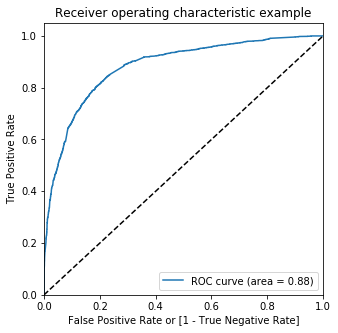

In [751]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [752]:
#The area under the curve of the ROC is 0.88 which good. So we have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187524,18.752428,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.355481,35.548118,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.202637,20.263712,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.867690,86.768956,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.656223,65.622332,7987,1,1,1,1,1,1,1,1,0,0,0


In [753]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.577232  0.969338  0.331626
0.2   0.2  0.748229  0.919052  0.641229
0.3   0.3  0.800976  0.841374  0.775672
0.4   0.4  0.812313  0.769828  0.838924
0.5   0.5  0.814202  0.698692  0.886556
0.6   0.6  0.796253  0.587490  0.927017
0.7   0.7  0.778618  0.506541  0.949040
0.8   0.8  0.756889  0.412510  0.972599
0.9   0.9  0.711699  0.268193  0.989501


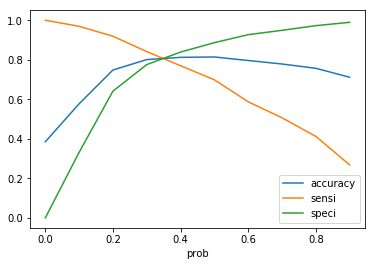

In [754]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [755]:
#Optimal point appears to be 0.38, so let's use 0.38 as our cutoff

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187524,18.752428,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.355481,35.548118,1012,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.202637,20.263712,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.867690,86.768956,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.656223,65.622332,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [756]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.812470477090222

In [757]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3233,  672],
       [ 519, 1927]], dtype=int64)

In [758]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [759]:
# Calculate Sensitivity

TP/(TP+FN)

0.7878168438266557

In [760]:
# Calculate Specificity

TN/(TN+FP)

0.8279129321382842

In [761]:
#Metrics look good now. Let's proceed further.

In [762]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
3009,0,0.007968,0.178347,0,0,0,0,0,1,0,0
1012,1,0.007968,0.085355,0,0,0,1,0,0,0,0
9226,0,0.000000,0.000000,0,1,0,0,0,0,1,0
4750,0,0.007968,0.619946,0,0,0,0,0,0,0,0
7987,0,0.019920,0.711590,0,0,0,0,0,0,1,0


In [763]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [764]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
3271,0,0.015936,0.070530,0,0,0,0,0,0,0,0,0,1,0,0
1490,0,0.019920,0.679695,0,0,0,0,0,0,0,1,0,1,0,0
7936,0,0.007968,0.033243,0,0,0,0,0,0,0,0,0,1,0,0
4216,0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,1,0
3830,0,0.031873,0.073675,0,0,0,0,0,0,0,0,0,1,0,0


In [765]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

# Check X_test_sm

X_test_sm.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
3271,1.0,0,0.015936,0.070530,0,0,0,0,0,0,0,0,0,1,0,0
1490,1.0,0,0.019920,0.679695,0,0,0,0,0,0,0,1,0,1,0,0
7936,1.0,0,0.007968,0.033243,0,0,0,0,0,0,0,0,0,1,0,0
4216,1.0,0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,1,0
3830,1.0,0,0.031873,0.073675,0,0,0,0,0,0,0,0,0,1,0,0


In [766]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [767]:
y_test_pred[:10]

3271    0.130392
1490    0.974349
7936    0.106684
4216    0.787642
3830    0.145953
1800    0.675893
6507    0.344766
4821    0.292184
4223    0.954717
4714    0.202637
dtype: float64

In [768]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head

y_pred_1.head()

,0
3271,0.130392
1490,0.974349
7936,0.106684
4216,0.787642
3830,0.145953


In [769]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [770]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [771]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1, y_pred_1*100],axis=1)

# Check 'y_pred_final'

y_pred_final.head()

,Converted,0,0
0,0,0.130392,13.039181
1,1,0.974349,97.434916
2,0,0.106684,10.668382
3,1,0.787642,78.764215
4,0,0.145953,14.595301


In [772]:
# Rename the column 

y_pred_final.columns= ['Converted', 'Conversion_Prob', 'Lead_Score']

In [773]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,Lead_Score
0,0,0.130392,13.039181
1,1,0.974349,97.434916
2,0,0.106684,10.668382
3,1,0.787642,78.764215
4,0,0.145953,14.595301


In [774]:
# Make predictions on the test set using 0.38 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [775]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,final_predicted
0,0,0.130392,13.039181,0
1,1,0.974349,97.434916,1
2,0,0.106684,10.668382,0
3,1,0.787642,78.764215,1
4,0,0.145953,14.595301,0


In [776]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8075651854572163

In [777]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1431,  303],
       [ 221,  768]], dtype=int64)

In [778]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [779]:
# Calculate sensitivity
TP / float(TP+FN)

0.7765419615773509

In [780]:
# Calculate specificity
TN / float(TN+FP)

0.8252595155709342

In [781]:
#Let's calculate Precision-Recall

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3462,  443],
       [ 737, 1709]], dtype=int64)

In [782]:
#Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7941449814126395

In [783]:
#Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6986917416189697

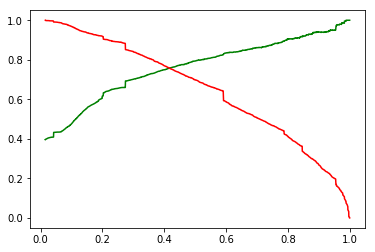

In [784]:
#Precision-Recall tradeoff-

from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [785]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187524,18.752428,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.355481,35.548118,1012,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.202637,20.263712,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.867690,86.768956,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.656223,65.622332,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [786]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8123130215714061

In [787]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3276,  629],
       [ 563, 1883]], dtype=int64)

In [788]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [789]:
# Calculate Precision

TP/(TP+FP)

0.7496019108280255

In [790]:
# Calculate Recall

TP/(TP+FN)

0.7698282910874897

In [791]:
#This looks good now. Let's proceed further.

In [792]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [793]:
y_test_pred[:10]

3271    0.130392
1490    0.974349
7936    0.106684
4216    0.787642
3830    0.145953
1800    0.675893
6507    0.344766
4821    0.292184
4223    0.954717
4714    0.202637
dtype: float64

In [794]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [795]:
# Let's see the head

y_pred_1.head()

,0
3271,0.130392
1490,0.974349
7936,0.106684
4216,0.787642
3830,0.145953


In [796]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [797]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [798]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1,y_pred_1*100],axis=1)

In [799]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0,0
0,0,0.130392,13.039181
1,1,0.974349,97.434916
2,0,0.106684,10.668382
3,1,0.787642,78.764215
4,0,0.145953,14.595301


In [800]:
# Rename the column 

y_pred_final.columns= ['Converted', 'Conversion_Prob', 'Lead_Score']

# Let's see the head of y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob,Lead_Score
0,0,0.130392,13.039181
1,1,0.974349,97.434916
2,0,0.106684,10.668382
3,1,0.787642,78.764215
4,0,0.145953,14.595301


In [801]:
# Make predictions on the test set using 0.4 as the cutoff


y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,final_predicted
0,0,0.130392,13.039181,0
1,1,0.974349,97.434916,1
2,0,0.106684,10.668382,0
3,1,0.787642,78.764215,1
4,0,0.145953,14.595301,0


In [802]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8127065736320235

In [803]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1454,  280],
       [ 230,  759]], dtype=int64)

In [804]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [805]:
# Calculate Precision

TP/(TP+FP)

0.7305101058710298

In [806]:
# Calculate Recall

TP/(TP+FN)

0.7674418604651163

In [807]:
prob = []
potential_leads = []
for i in np.arange(0.1,1,0.1):
    prob.append(i)
    potential_leads.append(sum(y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)) + 
                           sum(y_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)))

In [808]:
projected_leads = pd.DataFrame([prob,potential_leads]).T.rename(columns={0:'Probability Cut-Off',1:'Projected Leads'})

In [809]:
projected_leads

,Probability Cut-Off,Projected Leads
0,0.1,7108.0
1,0.2,5167.0
2,0.3,4135.0
3,0.4,3551.0
4,0.5,3023.0
5,0.6,2414.0
6,0.7,2002.0
7,0.8,1534.0
8,0.9,948.0
